# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset & Preprocess

In [2]:
df=pd.read_csv('C:\\Users\\RANA ASIM\\Downloads\\archive (1)\\Churn_Modelling.csv')
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
54,55,15569590,Yoo,601,Germany,Male,42,1,98495.72,1,1,0,40014.76,1
5446,5447,15785547,Slye,665,France,Male,28,8,191402.82,2,1,0,83238.40,0
6554,6555,15632576,Yashina,520,France,Male,31,4,93249.40,1,1,0,77335.75,0
7470,7471,15602456,Afanasyev,850,Germany,Female,47,4,99219.47,2,1,1,122141.13,0
5202,5203,15713354,Morrice,597,Germany,Female,22,6,101528.61,1,1,0,70529.00,1


In [3]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Exploring Data

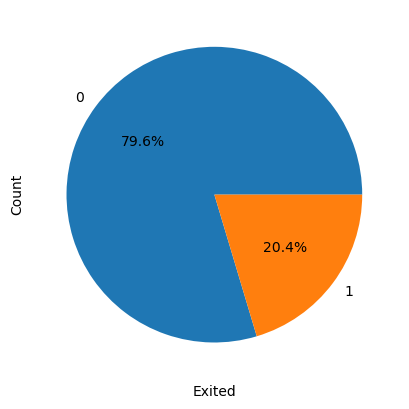

In [7]:
df['Exited'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

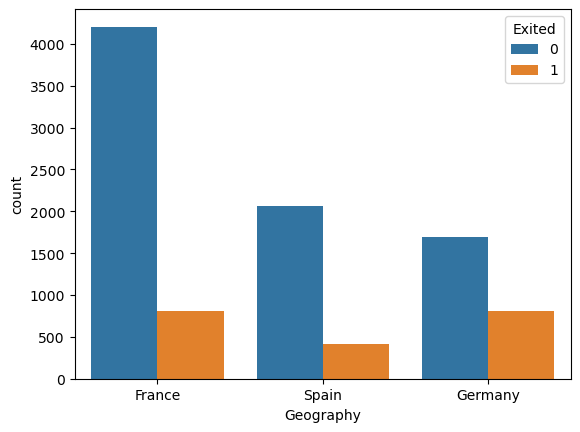

In [8]:
sns.countplot(x='Geography',hue='Exited',data=df)
plt.show()

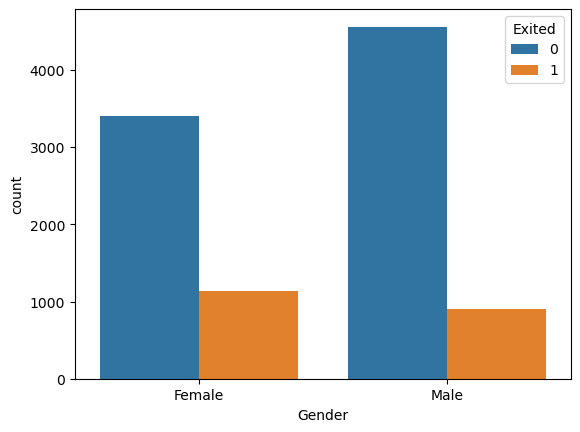

In [9]:
sns.countplot(x='Gender',hue='Exited',data=df)
plt.show()

# Encoding Catagorical Data

In [10]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [11]:
df.Gender = pd.Categorical(df.Gender).codes

In [12]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [13]:
df.Geography = pd.Categorical(df.Geography).codes

In [14]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9614,746,0,0,37,4,0.00,2,0,1,171039.56,0
1674,680,1,0,42,7,105722.69,1,1,1,90558.24,1
1955,565,1,0,58,3,108888.24,3,0,1,135875.51,1
5756,645,1,1,28,7,117466.03,2,1,1,34490.06,0
1919,618,0,1,56,7,0.00,1,1,1,142400.27,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int8   
 2   Gender           10000 non-null  int8   
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), int8(2)
memory usage: 722.8 KB


# Spliting Data

In [21]:
X = df.drop('Exited',axis=1)
y = df['Exited']
y.shape

(10000,)

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=40)
print('sahpe of X_train',X_train.shape)
print('sahpe of y_train',y_train.shape)
print('sahpe of X_test',X_test.shape)
print('sahpe of y_test',y_test.shape)

sahpe of X_train (8000, 10)
sahpe of y_train (8000,)
sahpe of X_test (2000, 10)
sahpe of y_test (2000,)


# Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

# Model Building

In [43]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)
print('Áccuracy of LR=',accuracy)

Áccuracy of LR= 0.8195


In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = lr.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('Áccuracy of RFC=',accuracy)

Áccuracy of RFC= 0.8195


In [54]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred=gbc.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy of GBC=',accuracy)

Accuracy of GBC= 0.8815


# Model Evaluation

<Axes: >

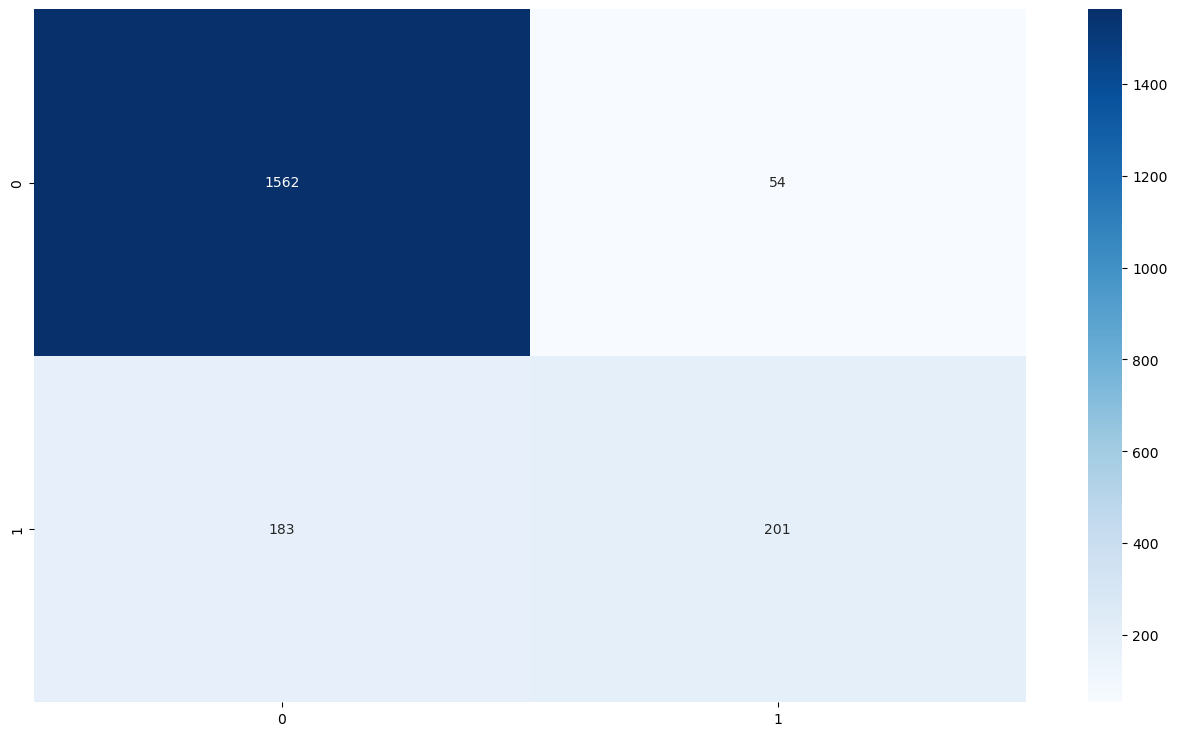

In [53]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
df=pd.DataFrame(confusion_matrix(y_test,y_pred))
sns.heatmap(df,annot=True, fmt='d',cmap=plt.cm.Blues)